# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [24]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.

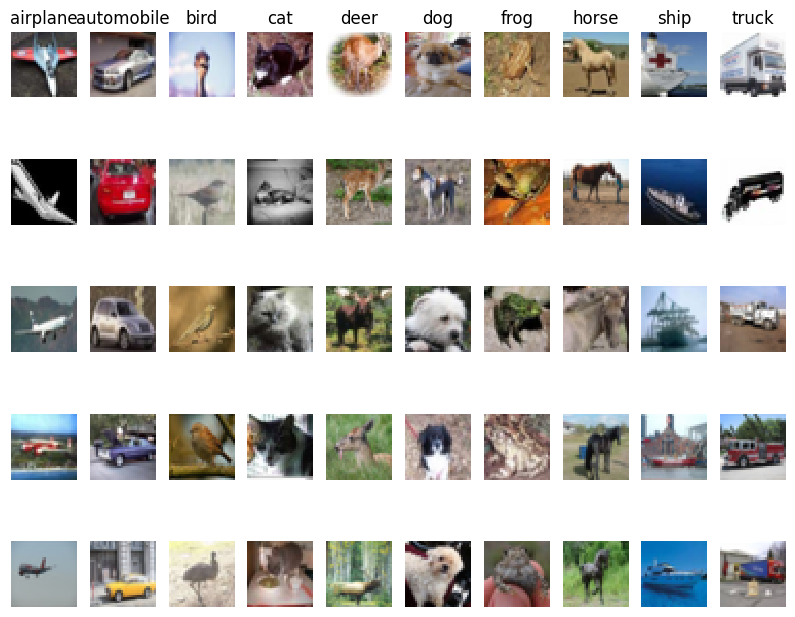

In [25]:
# Функция для вывода нескольких примеров изображений для каждого класса
def plot_images(X, y, classes):
    num_classes = len(classes)
    samples_per_class = 5

    for y_i, cls in enumerate(classes):
        idxs = np.flatnonzero(y == y_i)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_i + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)

# Зададим названия классов для CIFAR-10
classes_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Выведем примеры изображений для каждого класса
plot_images(X_train, y_train, classes_cifar10)
plt.show()

1.3 Разделите данные на обучающую и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [26]:
# Разделение данных на обучающую и тестовую выборки (в данном случае, разделение уже выполнено)
# X_train, y_train, X_test, y_test

# Преобразование каждого изображения в одномерный массив
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print('Размерность обучающей выборки после преобразования:', X_train_flat.shape)
print('Размерность тестовой выборки после преобразования:', X_test_flat.shape)

Размерность обучающей выборки после преобразования: (50000, 3072)
Размерность тестовой выборки после преобразования: (10000, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [27]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train_flat, y_train)  # Переформатируем массив для совместимости

1.5 Выполните классификацию на тестовой выборке

In [28]:
# Задаем количество изображений для случайной выборки
num_test_samples = 500

# Случайно выбираем индексы изображений для тестовой выборки
test_sample_idxs = random.sample(range(X_test_flat.shape[0]), num_test_samples)

# Выбираем соответствующие изображения и метки для тестовой выборки
X_test_subsample = X_test_flat[test_sample_idxs]
y_test_subsample = y_test[test_sample_idxs]

# Выполняем классификацию на уменьшенной тестовой выборке
y_test_pred_subsample = classifier.predict(X_test_subsample)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 

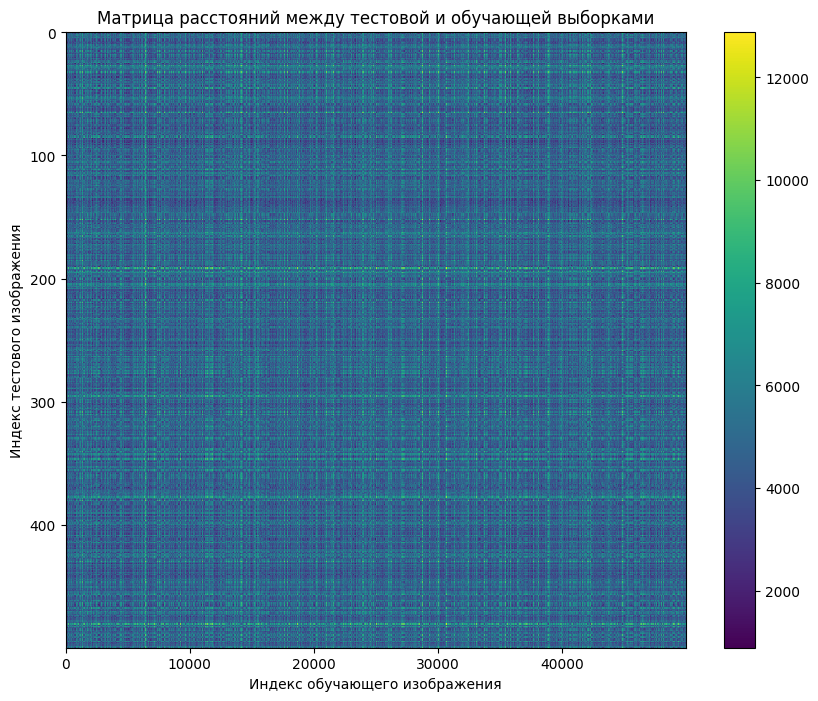

In [29]:
# Вычисляем матрицу расстояний между изображениями из тестовой и обучающей выборок
dists = classifier.compute_distances_no_loops(X_test_subsample)

# Визуализируем матрицу расстояний
plt.imshow(dists, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Матрица расстояний между тестовой и обучающей выборками')
plt.xlabel('Индекс обучающего изображения')
plt.ylabel('Индекс тестового изображения')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [30]:
# Оцениваем точность классификации
accuracy_subsample = np.mean(y_test_pred_subsample == y_test_subsample)
print('Точность классификации на уменьшенной тестовой выборке из 500 изображений:', accuracy_subsample)

Точность классификации на уменьшенной тестовой выборке из 500 изображений: 0.344


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

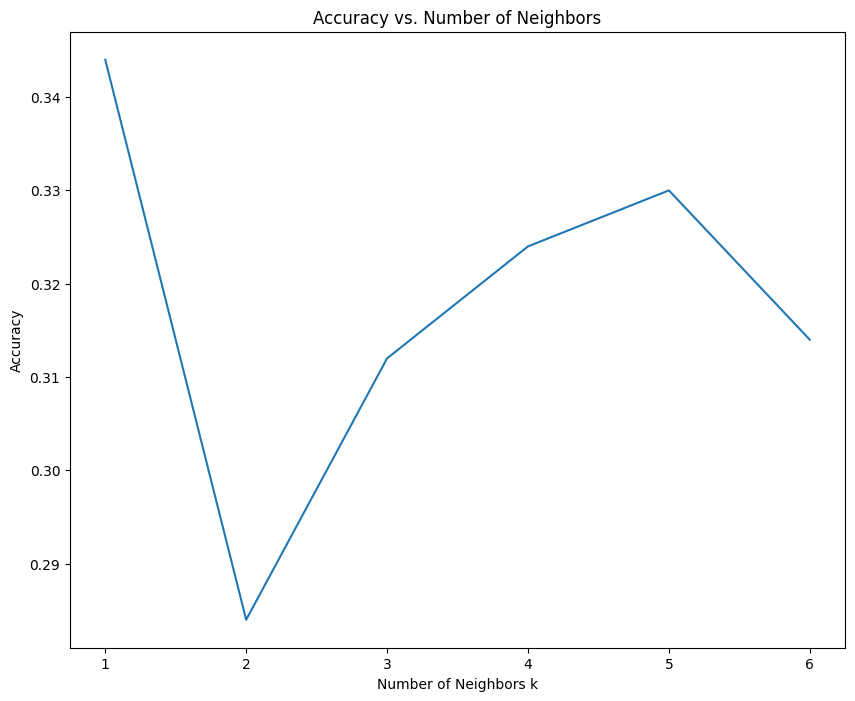

In [31]:
# Задаем диапазон значений k
k_values = range(1, 7)

# Инициализируем список для сохранения точности
accuracies = []

for k in k_values:
    # Инициализируем классификатор с текущим значением k
    classifier = KNearestNeighbor()
    classifier.train(X_train_flat, y_train)
    y_test_pred_subsample_k = classifier.predict(X_test_subsample, k=k)
    
    # Вычисляем и сохраняем точность
    accuracy = np.mean(y_test_pred_subsample_k == y_test_subsample)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [32]:
from sklearn.model_selection import KFold
import numpy as np

# Инициализируем KFold
kf = KFold(n_splits=5, random_state=None, shuffle=True)

# Для сохранения средней точности для каждого k
mean_accuracies = []

for k in k_values:  # k_values - список значений k, который вы тестировали ранее
    accuracies = []
    
    for train_index, val_index in kf.split(X_test_subsample):
        X_train_k, X_val_k = X_test_subsample[train_index], X_test_subsample[val_index]
        y_train_k, y_val_k = y_train[train_index], y_train[val_index]
        
        # Создаем и обучаем классификатор на текущем разделении
        classifier = KNearestNeighbor()
        classifier.train(X_train_k, y_train_k)
        
        # Предсказываем и вычисляем точность на валидационном наборе
        y_pred = classifier.predict(X_val_k, k=k)
        accuracy = np.mean(y_pred == y_val_k)
        accuracies.append(accuracy)
    
    # Сохраняем среднюю точность для текущего k
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

# Выбираем k с максимальной средней точностью
best_k = k_values[np.argmax(mean_accuracies)]
print("Лучшее значение k:", best_k)

Лучшее значение k: 4



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [33]:
# Переобучение классификатора с использованием лучшего значения k
best_k_classifier = KNearestNeighbor()
best_k_classifier.train(X_train_flat, y_train)

# Прогнозирование меток классов на тестовом наборе
y_test_pred = best_k_classifier.predict(X_test_subsample, k=best_k)

# Оценка точности классификатора на тестовом наборе
test_accuracy = np.mean(y_test_pred == y_test_subsample)
print("Точность на тестовом наборе:", test_accuracy)

Точность на тестовом наборе: 0.324


1.11 Сделайте выводы по результатам 1 части задания.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [34]:
from sklearn.model_selection import train_test_split

# Преобразование каждого изображения из обучающего и тестового наборов в одномерный массив
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Разделение обучающего набора на новый обучающий и валидационный наборы
X_train_flat, X_val_flat, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print('Размеры выборок:')
print('Обучающая выборка:', X_train_flat.shape)
print('Тестовая выборка:', X_test_flat.shape)
print('Валидационная выборка:', X_val_flat.shape)

Размеры выборок:
Обучающая выборка: (40000, 3072)
Тестовая выборка: (10000, 3072)
Валидационная выборка: (10000, 3072)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнительную размерность к массиву дынных и заполните ее 1.

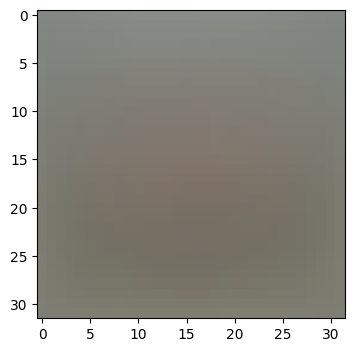

(40000, 3073) (10000, 3073) (10000, 3073)


In [35]:
# 2.2 Вычисление и вычитание среднего изображения
mean_image = np.mean(X_train_flat, axis=0)

# Визуализация среднего изображения
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # Преобразование нужно адаптировать под ваш формат данных
plt.show()

# Вычитание среднего изображения из всех выборок
X_train_flat -= mean_image
X_val_flat -= mean_image
X_test_flat -= mean_image

# 2.3 Добавление дополнительной размерности
X_train_flat = np.hstack([X_train_flat, np.ones((X_train_flat.shape[0], 1))])
X_val_flat = np.hstack([X_val_flat, np.ones((X_val_flat.shape[0], 1))])
X_test_flat = np.hstack([X_test_flat, np.ones((X_test_flat.shape[0], 1))])

print(X_train_flat.shape, X_val_flat.shape, X_test_flat.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py

In [36]:
from scripts.classifiers.linear_svm import svm_loss_naive, svm_loss_vectorized
import time

# Выберем случайное подмножество из обучающего набора для разработки
num_dev_samples = 500  # количество примеров в разработочном наборе
mask = np.random.choice(X_train_flat.shape[0], num_dev_samples, replace=False)
X_dev = X_train_flat[mask]
y_dev = y_train[mask]

W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.167582


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [37]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -0.806661 analytic: -0.806661, relative error: 8.730736e-11
numerical: 10.158797 analytic: 10.158797, relative error: 1.281200e-11
numerical: 3.756010 analytic: 3.756010, relative error: 8.040412e-11
numerical: -6.354746 analytic: -6.354746, relative error: 6.229846e-11
numerical: 9.497277 analytic: 9.497277, relative error: 2.237851e-11
numerical: 22.316779 analytic: 22.316779, relative error: 6.914066e-12
numerical: 14.359849 analytic: 14.359849, relative error: 2.456025e-11
numerical: -17.541911 analytic: -17.541910, relative error: 2.119447e-13
numerical: -2.376720 analytic: -2.376720, relative error: 1.698458e-10
numerical: -5.852741 analytic: -5.852741, relative error: 8.041004e-12
numerical: -25.045867 analytic: -25.045867, relative error: 5.792375e-13
numerical: -0.852703 analytic: -0.852703, relative error: 3.088882e-10
numerical: -33.948856 analytic: -34.019517, relative error: 1.039620e-03
numerical: 13.159706 analytic: 13.159706, relative error: 2.196293e-11
nume

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [38]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.082087s
Vectorized loss and gradient: computed in 0.002001s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [39]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_dev, y_dev, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 782.895827
iteration 100 / 1500: loss 281.166187
iteration 200 / 1500: loss 104.168177
iteration 300 / 1500: loss 40.005317
iteration 400 / 1500: loss 16.632073
iteration 500 / 1500: loss 8.354263
iteration 600 / 1500: loss 5.099067
iteration 700 / 1500: loss 4.045205
iteration 800 / 1500: loss 3.713745
iteration 900 / 1500: loss 3.443624
iteration 1000 / 1500: loss 3.511429
iteration 1100 / 1500: loss 3.376337
iteration 1200 / 1500: loss 3.132726
iteration 1300 / 1500: loss 3.262703
iteration 1400 / 1500: loss 3.557295
That took 2.555233s


In [40]:
y_train_pred = svm.predict(X_train_flat)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val_flat)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.297300
validation accuracy: 0.297700


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [41]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

# Параметры для кросс-валидации
num_folds = 5
kf = KFold(n_splits=num_folds)

# Инициализация переменных для сохранения результатов
results_kfold_dev = {}
best_val_kfold_dev = -1
best_svm_kfold_dev = None
best_params_kfold_dev = {'lr': 0, 'reg': 0}

# Перебор комбинаций параметров
for lr in learning_rates:
    for reg in regularization_strengths:
        val_accuracies_dev = []
        for train_index, val_index in kf.split(X_dev):
            # Разделение данных на подвыборки для текущего разбиения
            X_train_kfold_dev, X_val_kfold_dev = X_dev[train_index], X_dev[val_index]
            y_train_kfold_dev, y_val_kfold_dev = y_dev[train_index], y_dev[val_index]

            # Создание и обучение SVM на текущем наборе
            svm_dev = LinearSVM()
            svm_dev.train(X_train_kfold_dev, y_train_kfold_dev, learning_rate=lr, reg=reg, num_iters=1000)

            # Вычисление точности на валидационном наборе
            y_val_pred_kfold_dev = svm_dev.predict(X_val_kfold_dev)
            val_accuracy_dev = np.mean(y_val_pred_kfold_dev == y_val_kfold_dev)
            val_accuracies_dev.append(val_accuracy_dev)

        # Средняя точность валидации для текущих параметров
        avg_val_accuracy_dev = np.mean(val_accuracies_dev)
        results_kfold_dev[(lr, reg)] = avg_val_accuracy_dev
        
        # Обновление лучших параметров, если найдено улучшение
        if avg_val_accuracy_dev > best_val_kfold_dev:
            best_val_kfold_dev = avg_val_accuracy_dev
            best_svm_kfold_dev = svm_dev
            best_params_kfold_dev['lr'], best_params_kfold_dev['reg'] = lr, reg

# Вывод результатов для разработочного подмножества
for lr, reg in sorted(results_kfold_dev):
    val_accuracy_dev = results_kfold_dev[(lr, reg)]
    print('Dev set - lr %e reg %e val accuracy: %f' % (lr, reg, val_accuracy_dev))

print('Best validation accuracy on dev set achieved with KFold: %f' % best_val_kfold_dev)
print('Best learning rate on dev set:', best_params_kfold_dev['lr'])
print('Best regularization strength on dev set:', best_params_kfold_dev['reg'])

# Окончательное тестирование лучшей модели на тестовой выборке
y_test_pred_kfold_dev = best_svm_kfold_dev.predict(X_test_flat)
test_accuracy_kfold_dev = np.mean(y_test == y_test_pred_kfold_dev)
print('Linear SVM on raw pixels final test set accuracy with KFold on dev set: %f' % test_accuracy_kfold_dev)

C:\Users\lican\PycharmProjects\neural-networks-course\Lab1-2\scripts\classifiers\linear_svm.py:90: RuntimeWarning: overflow encountered in scalar multiply
  loss = np.sum(margins) / num_train + reg * np.sum(W * W)
C:\Users\lican\PycharmProjects\neural-networks-course\venv\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\lican\PycharmProjects\neural-networks-course\Lab1-2\scripts\classifiers\linear_svm.py:90: RuntimeWarning: overflow encountered in multiply
  loss = np.sum(margins) / num_train + reg * np.sum(W * W)
C:\Users\lican\PycharmProjects\neural-networks-course\Lab1-2\scripts\classifiers\linear_svm.py:111: RuntimeWarning: overflow encountered in multiply
  dW += 2 * reg * W  # Gradient of the regularization term
C:\Users\lican\PycharmProjects\neural-networks-course\Lab1-2\scripts\classifiers\linear_svm.py:88: RuntimeWarning: overflow encountered in subtract
  margins 

Dev set - lr 1.000000e-07 reg 2.500000e+04 val accuracy: 0.256000
Dev set - lr 1.000000e-07 reg 5.000000e+04 val accuracy: 0.264000
Dev set - lr 5.000000e-05 reg 2.500000e+04 val accuracy: 0.058000
Dev set - lr 5.000000e-05 reg 5.000000e+04 val accuracy: 0.108000
Best validation accuracy on dev set achieved with KFold: 0.264000
Best learning rate on dev set: 1e-07
Best regularization strength on dev set: 50000.0
Linear SVM on raw pixels final test set accuracy with KFold on dev set: 0.290600


2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[[[130.71074 136.05614 132.5538 ]
  [130.14036 135.44238 131.85358]
  [131.05044 136.24616 132.58144]
  [131.56886 136.67804 132.8775 ]
  [132.1847  137.22858 133.26738]
  [132.85184 137.8545  133.78034]
  [133.37154 138.28386 134.15504]
  [133.89092 138.74072 134.5227 ]
  [134.48504 139.27524 135.01422]
  [134.9326  139.6326  135.29142]
  [135.23398 139.94098 135.51004]
  [135.40374 140.0906  135.659  ]
  [135.62016 140.26882 135.81572]
  [135.63418 140.26172 135.80778]
  [135.63402 140.22544 135.7769 ]
  [135.61138 140.17206 135.71862]
  [135.53046 140.09332 135.58066]
  [135.5036  140.06138 135.55468]
  [135.49102 140.05346 135.5742 ]
  [135.38346 139.96092 135.47278]
  [135.10962 139.71384 135.20938]
  [134.9583  139.6188  135.177  ]
  [134.8102  139.49842 135.10764]
  [134.52658 139.29726 134.92798]
  [134.04618 138.94646 134.62446]
  [133.6069  138.58728 134.33616]
  [133.0759  138.10716 133.93838]
  [132.32476 137.4154  133.3761 ]
  [131.58878 136.7739  132.84264]
  [131.05902 1

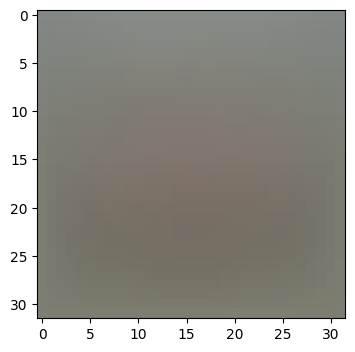

NameError: name 'X_val' is not defined

In [42]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [ ]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [ ]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

3.10 Сделайте выводы по третьей части задания